# Practice 3: 使用 Tensorflow 对 CIFAR10 数据集进行分类和预测

本节练习将使用 TensorFlow 和 Keras 来对 [CIFAR10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) 的图像进行分类.


本次编程实践将分为以下几个步骤:
>
1. 加载并对数据进行预处理。
2. 构建自己的模型（一个简单神经网络与一个卷积神经网络）。
3. 训练并评估自己的模型。
4. 加载 keras 中的预训练模型并评估模型性能。
5. 分析实验结果。

---
## 1. 加载并可视化数据

### 1.1 直接从 keras 加载 CIFAR10 数据并归一化处理。

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

gpus = tf.config.experimental.list_physical_devices('GPU')

num_classes = 10

# 加载 CIFAR10 中的训练集、验证集和测试集 （x_train， y_train， x_val， y_val， x_test， y_test）
(x_train, y_train), (x_test, y_test)=cifar10.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.02)

# 查看输入维度
input_shape = x_train.shape[1:]

# 归一化处理数据
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_val.shape[0], 'val samples')
print(x_test.shape[0], 'test samples')
print(y_train[:2])
#将类别从离散值转化为 one-hot 向量
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)
print(y_train[:2])

170498071/170498071 [==============================] - 3s 0us/step
x_train shape: (49000, 32, 32, 3)
y_train shape: (49000, 1)
49000 train samples
1000 val samples
10000 test samples
[[2]
 [1]]
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


### 1.2 随机选择一张图像并可视化。

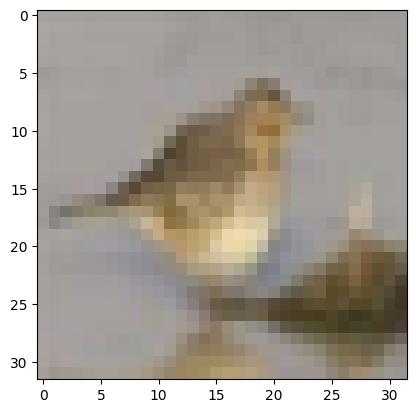

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(x_train[0])

---
## 2. 构建网络模型

### 2.1 构建简单的人工神经网络模型

In [3]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 创建回调， 保存模型权重
checkpoint_path1 = 'model1_weights.h5'
checkpoint_callback1 = ModelCheckpoint(filepath=checkpoint_path1, save_weights_only=True, verbose=1)

# 构建简单的神经网络 model1
model1 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
tf.keras.layers.Dense(3000, activation='relu'),
tf.keras.layers.Dense(1000, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

# 封装模型
model1.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型结构
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/5
1532/1532 [==============================] - ETA: 0s - loss: 1.9078 - accuracy: 0.3206
Epoch 1: saving model to model1_weights.h5
1532/1532 [==============================] - 7s 3ms/step - loss: 1.9078 - accuracy: 0.3206 - val_loss: 198.0553 - val_accuracy: 0.3500
Epoch 2/5
1525/1532 [============================>.] - ETA: 0s - loss: 1.6716 - accuracy: 0.3998
Epoch 2: saving model to model1_weights.h5
1532/1532 [==============================] - 5s 3ms/step - loss: 1.6724 - accuracy: 0.3996 - val_loss: 208.8882 - val_accuracy: 0.3710
Epoch 3/5
1519/1532 [============================>.] - ETA: 0s - loss: 1.5876 - accuracy: 0.4330
Epoch 3: saving model to model1_weights.h5
1532/1532 [==============================] - 5s 3ms/step - loss: 1.5876 - accuracy: 0.4329 - val_loss: 229.8168 - val_accuracy: 0.3690
Epoch 4/5
1528/1532 [============================>.] - ETA: 0s - loss: 1.5370 - accuracy: 0.4488
Epoch 4: saving model to model1_weights.h5
1532/1532 [========================

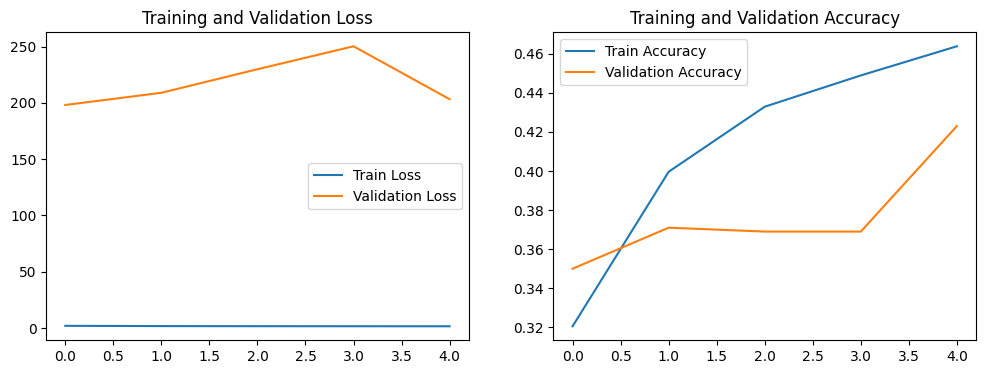

In [4]:
# 训练模型 model1
model1_history = model1.fit(x_train, y_train, epochs=5, validation_data=(x_val,y_val), callbacks=[checkpoint_callback1])

# 绘制训练和验证损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model1_history.history['loss'], label='Train Loss')
plt.plot(model1_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(model1_history.history['accuracy'], label='Train Accuracy')
plt.plot(model1_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [5]:
# 验证模型在测试集上的准确率
model1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5246 - accuracy: 0.4578


[1.524580955505371, 0.4578000009059906]

In [6]:
# 交叉验证
from sklearn.metrics import classification_report
import numpy as np
y_pred = model1.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_report = [np.argmax(element) for element in y_test]

print("Classification Report: \n", classification_report(y_test_report, y_pred_classes))

313/313 [==============================] - 1s 1ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.41      0.50      1000
           1       0.52      0.68      0.59      1000
           2       0.40      0.12      0.18      1000
           3       0.28      0.52      0.36      1000
           4       0.41      0.37      0.39      1000
           5       0.50      0.23      0.32      1000
           6       0.40      0.66      0.50      1000
           7       0.54      0.48      0.51      1000
           8       0.62      0.59      0.61      1000
           9       0.51      0.51      0.51      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



### 2.2 构建卷积神经网络

### 2.2.1 卷积神经网络的基础算子

卷积神经网络是目前计算机视觉中使用最普遍的模型结构，如图所示，由$M$个卷积层和$b$个汇聚层组合作用在输入图片上，在网络的最后通常会加入$K$个全连接层。

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/c08f9a5599ae4f9d8eedb0131c54af859fcfaae003224bc6b247d60391b2b102" width = "1000"></center>

一般常用的卷积有以下三类：

1. **窄卷积**：步长$S=1$，两端不补零$P=0$，卷积后输出尺寸为：

$$M' = M - U + 1$$
$$N' = N - V + 1$$

2. **宽卷积**：步长$S=1$，两端补零$P=U-1=V-1$，卷积后输出尺寸为：

$$M' = M + U - 1$$
$$N' = N + V - 1$$

3. **等宽卷积**：步长$S=1$，两端补零$P=\frac{(U-1)}{2}=\frac{(V-1)}{2}$，卷积后输出尺寸为：

$$M' = M$$
$$N' = N$$

### 2.2.2 期望卷积结构（输出大小）
1. conv2D(stride=1, padding=0, 'relu') : (30, 30, 32)

2. MaxPooling(padding=0) : (15, 15, 32)

3. conv2D(stride=1, padding=0, 'relu') : (13, 13, 64)

4. Maxpooling(padding=0) : (6, 6, 64)

5. flatten

6. dense(64, 'relu')

7. output('softmax')

<center><img src="https://ai-studio-static-online.cdn.bcebos.com/d4d1434e62154505a56259d09c9b6e072f8331830c2b4ffc97b5d7bd0181b075" width = "600"></center>
<center><img src="https://ai-studio-static-online.cdn.bcebos.com/7a75788ae8d54f22882590a0923f5dd28bca6e120b1a4431abe122980d06224f" width = "600"></center>

In [7]:
# 构建 CNN 模型 model2
model2 = tf.keras.Sequential([
tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), input_shape=(32, 32, 3)),
tf.keras.layers.MaxPool2D((2,2)),

tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3)),
tf.keras.layers.MaxPool2D((2,2)),

tf.keras.layers.Flatten(),
tf.keras.layers.Dense(64, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')
])

# 封装模型
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 打印模型
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

Epoch 1/5
1532/1532 [==============================] - ETA: 0s - loss: 1.4535 - accuracy: 0.4832
Epoch 1: saving model to model2_weights.h5
1532/1532 [==============================] - 8s 3ms/step - loss: 1.4535 - accuracy: 0.4832 - val_loss: 258.6025 - val_accuracy: 0.3630
Epoch 2/5
1520/1532 [============================>.] - ETA: 0s - loss: 1.0806 - accuracy: 0.6226
Epoch 2: saving model to model2_weights.h5
1532/1532 [==============================] - 5s 3ms/step - loss: 1.0801 - accuracy: 0.6227 - val_loss: 237.6320 - val_accuracy: 0.4480
Epoch 3/5
1528/1532 [============================>.] - ETA: 0s - loss: 0.9465 - accuracy: 0.6728
Epoch 3: saving model to model2_weights.h5
1532/1532 [==============================] - 5s 3ms/step - loss: 0.9465 - accuracy: 0.6729 - val_loss: 193.8732 - val_accuracy: 0.4850
Epoch 4/5
1521/1532 [============================>.] - ETA: 0s - loss: 0.8514 - accuracy: 0.7049
Epoch 4: saving model to model2_weights.h5
1532/1532 [========================

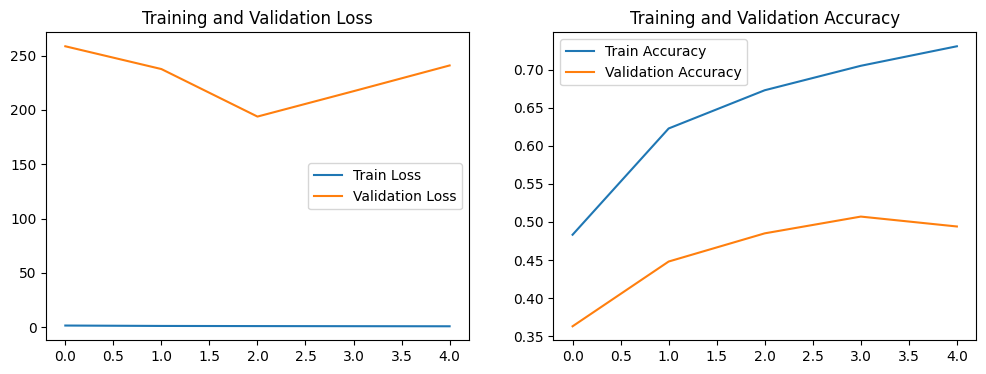

In [8]:
# 创建回调， 保存模型权重
checkpoint_path2 = 'model2_weights.h5'
checkpoint_callback2 = ModelCheckpoint(filepath=checkpoint_path2, save_weights_only=True, verbose=1)

# 模型训练
model2_history = model2.fit(x_train, y_train, epochs=5, validation_data=(x_val,y_val), callbacks=[checkpoint_callback2])

# 绘制训练和验证损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model2_history.history['loss'], label='Train Loss')
plt.plot(model2_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(model2_history.history['accuracy'], label='Train Accuracy')
plt.plot(model2_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

In [9]:
# 估计模型在测试集上的表现
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9820 - accuracy: 0.6729


[0.9819949269294739, 0.6729000210762024]

---
## 4. 加载预训练模型

In [10]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import models
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import backend as K

# 加载预训练的 DenseNet121 模型，不包括顶层
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# 冻结所有层，我们稍后将解冻最后两层
for layer in base_model.layers:
    layer.trainable = False

# 添加自定义层
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # 可训练层
x = Dense(256, activation='relu')(x)  # 可训练层
x = Dense(64, activation='relu')(x)  # 可训练层
predictions = Dense(10, activation='softmax')(x)  # 可训练层，假设有 10 个类别

# 构建最终模型
model3 = models.Model(inputs=base_model.input, outputs=predictions)

# 解冻最后两层
model3.layers[-4].trainable = True
model3.layers[-3].trainable = True
model3.layers[-2].trainable = True
model3.layers[-1].trainable = True

# 修改损失函数，加上正则化项
def custom_loss_with_regularization(model, regularization_factor):
    def custom_loss(y_true, y_pred):
        standard_loss = K.categorical_crossentropy(y_true, y_pred)
        regularization_term = sum([K.sum(K.square(w)) for w in model.trainable_weights])
        total_loss = standard_loss + regularization_factor * regularization_term
        return total_loss
    return custom_loss

# 编译模型
model3.compile(optimizer='adam', loss=custom_loss_with_regularization(model3, 0.001), metrics=['accuracy'])

model3.summary()


29084464/29084464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 38, 38, 3)            0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1/conv (Conv2D)         (None, 16, 16, 64)           9408      ['zero_padding2d[0][0]']      
                                                                                                  
 conv1/bn (BatchNormalizati  

Epoch 1/20
1532/1532 [==============================] - 30s 15ms/step - loss: 1.6770 - accuracy: 0.5527 - val_loss: 14.3256 - val_accuracy: 0.1570 - lr: 0.0010
Epoch 2/20
1532/1532 [==============================] - 20s 13ms/step - loss: 1.3268 - accuracy: 0.6072 - val_loss: 15.0585 - val_accuracy: 0.1510 - lr: 0.0010
Epoch 3/20
1532/1532 [==============================] - 20s 13ms/step - loss: 1.2515 - accuracy: 0.6248 - val_loss: 17.5205 - val_accuracy: 0.1430 - lr: 0.0010
Epoch 4/20
1532/1532 [==============================] - 20s 13ms/step - loss: 1.2124 - accuracy: 0.6368 - val_loss: 15.8642 - val_accuracy: 0.1380 - lr: 0.0010
Epoch 5/20
1532/1532 [==============================] - 20s 13ms/step - loss: 1.0561 - accuracy: 0.6884 - val_loss: 18.7382 - val_accuracy: 0.1310 - lr: 2.0000e-04
Epoch 6/20
1532/1532 [==============================] - 20s 13ms/step - loss: 1.0106 - accuracy: 0.7009 - val_loss: 22.3793 - val_accuracy: 0.1140 - lr: 2.0000e-04
Epoch 7/20
1532/1532 [==========

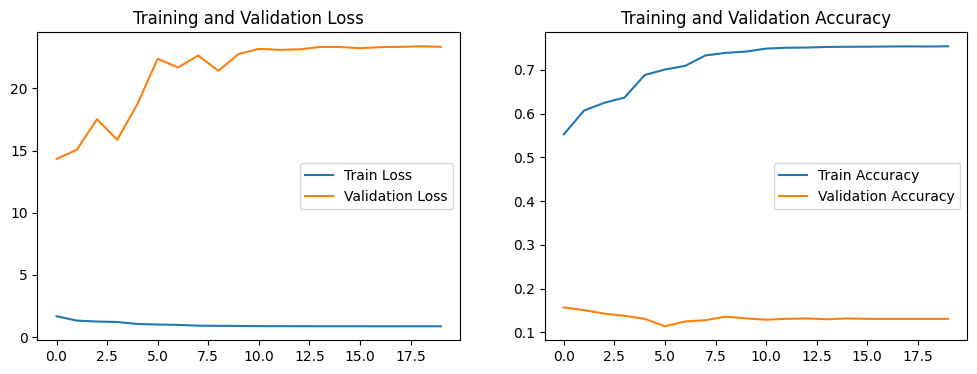

In [11]:
# 创建回调， 保存模型权重
checkpoint_path3 = 'model3_weights.h5'
checkpoint_callback3 = ModelCheckpoint(filepath=checkpoint_path3, save_weights_only=True, verbose=1)

from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# 模型训练
model3_history = model3.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), callbacks=[reduce_lr])
# 绘制训练和验证损失
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(model3_history.history['loss'], label='Train Loss')
plt.plot(model3_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

# 绘制训练和验证准确率
plt.subplot(1, 2, 2)
plt.plot(model3_history.history['accuracy'], label='Train Accuracy')
plt.plot(model3_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()

## 5. 评估模型性能

In [14]:
y_pred = model3.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
y_test_report = [np.argmax(element) for element in y_test]

print("Classification Report: \n", classification_report(y_test_report, y_pred_classes))

313/313 [==============================] - 3s 11ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.70      0.71      0.70      1000
           1       0.73      0.74      0.73      1000
           2       0.60      0.56      0.58      1000
           3       0.52      0.51      0.52      1000
           4       0.62      0.62      0.62      1000
           5       0.61      0.59      0.60      1000
           6       0.69      0.74      0.71      1000
           7       0.72      0.72      0.72      1000
           8       0.75      0.76      0.76      1000
           9       0.71      0.73      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



313/313 [==============================] - 3s 10ms/step
[3, 8, 8, 0, 6]
The real class of the 70th image in the test dataset is bird
The predicted class of the 70th image in the test dataset is bird


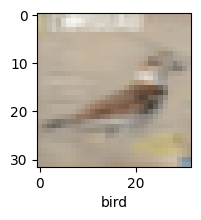

In [15]:
def verification(index, model):
    classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
    y_pred = model.predict(x_test)
    class_pred = [np.argmax(element) for element in y_pred]
    y_test_convert = [np.argmax(element) for element in y_test]
    print(y_test_convert[:5])
    print(f'The real class of the {index}th image in the test dataset is {classes[y_test_convert[index]]}')
    print(f'The predicted class of the {index}th image in the test dataset is {classes[class_pred[index]]}')
    plt.figure(figsize = (15,2))
    plt.imshow(x_test[index])
    plt.xlabel(classes[y_test_report[index]])

test_model = verification(70, model3)